In [ ]:
import matplotlib
import matplotlib.pyplot as plots
%matplotlib inline
import numpy as np
import pandas as pd

In [ ]:
baby = pd.read_csv('/content/test.csv')

In [ ]:
baby

,Unnamed: 0,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,0,120,284,27,62,100,False
1,1,113,282,33,64,135,False
2,2,128,279,28,64,115,True
3,3,108,282,23,67,125,True
4,4,136,286,25,62,93,False
...,...,...,...,...,...,...,...
1169,1169,113,275,27,60,100,False
1170,1170,128,265,24,67,120,False
1171,1171,130,291,30,65,150,True
1172,1172,125,281,21,65,110,False


In [ ]:
smoking_and_maternal_age = baby[['Maternal Smoker', 'Maternal Age']]
smoking_and_maternal_age

,Maternal Smoker,Maternal Age
0,False,27
1,False,33
2,True,28
3,True,23
4,False,25
...,...,...
1169,False,27
1170,False,24
1171,True,30
1172,False,21


In [ ]:
smoking_and_maternal_age['Maternal Smoker'] == True

0       False
1       False
2        True
3        True
4       False
        ...  
1169    False
1170    False
1171     True
1172    False
1173    False
Name: Maternal Smoker, Length: 1174, dtype: bool

In [ ]:
smoker = smoking_and_maternal_age['Maternal Age'] [smoking_and_maternal_age['Maternal Smoker'] == True]
smoker

2       28
3       23
8       30
10      32
11      23
        ..
1162    28
1163    29
1164    21
1165    30
1171    30
Name: Maternal Age, Length: 459, dtype: int64

In [ ]:
non_smoker = smoking_and_maternal_age['Maternal Age'] [smoking_and_maternal_age['Maternal Smoker'] == False]
non_smoker

0       27
1       33
4       25
5       33
6       23
        ..
1168    27
1169    27
1170    24
1172    21
1173    38
Name: Maternal Age, Length: 715, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

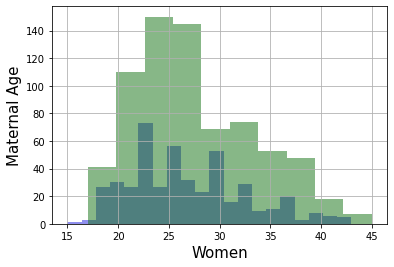

In [ ]:
import seaborn as sns
smoker.hist(histtype='stepfilled', alpha=.5, color=sns.desaturate("blue", .75),bins=20)   
non_smoker.hist(histtype='stepfilled', alpha=.5, color=sns.desaturate("green", .75), bins=10)
plt.xlabel('Women',fontsize=15)
plt.ylabel('Maternal Age',fontsize=15)
plt.show()

INFERENCE:The Maternal Age of mothers  who smoked seem lower, on average than the age of the non-smokers.

TEST STATISTIC:
The statistic we use here will be the difference between the average of 2 groups.
TEST_VALUE=AVERAGE AGE OF SMOKING GROUP-AVERAGE AGE OF NON SMOKING GROUP



  NULL HYPOTHESIS:THE AVERAGE AGE OF MOTHERS WHO SMOKE IS SAME AS THE AVERAGE AGE OF MOTHERS WHO DOESN'T SMOKE

  
  ALTERNATE HYPOTHESIS:
  THE AVERAGE AGE OF MOTHERS WHO SMOKE IS NOT SAME AS THE AVERAGE AGE OF MOTHERS WHO DOESN'T SMOKE

In [ ]:
means_table = smoking_and_maternal_age.groupby('Maternal Smoker').mean()

In [ ]:
means_table

,Maternal Age
Maternal Smoker,
False,27.544056
True,26.736383


In [ ]:
observed_difference = means_table['Maternal Age'][0] - means_table['Maternal Age'][1]

In [ ]:
observed_difference

0.8076725017901509

OBSERVED STATISTIC: THE DIFFERENCE IN AVERAGE AGE OF MOTHERS WHO DOESN'T SMOKE IS SLIGHTLY GREATER THE MOTHERS WHO SMOKE
WHICH IS EQUAL TO 0.8076725017901509

Predicting the Statistic Under the Null Hypothesis

In [ ]:
smoking_and_maternal_age

,Maternal Smoker,Maternal Age
0,False,27
1,False,33
2,True,28
3,True,23
4,False,25
...,...,...
1169,False,27
1170,False,24
1171,True,30
1172,False,21


In [ ]:
shuffled = smoking_and_maternal_age.sample(1174,replace = False)
shuffled

,Maternal Smoker,Maternal Age
24,True,27
267,False,27
432,True,37
1007,True,24
905,False,19
...,...,...
359,True,23
700,False,25
946,True,22
373,False,25


In [ ]:
shuffled_age = shuffled['Maternal Age']

In [ ]:
original_and_shuffled= smoking_and_maternal_age.assign(shuffled_age=shuffled_age.values )

In [ ]:
all_group_means= original_and_shuffled.groupby('Maternal Smoker').mean()
all_group_means

,Maternal Age,shuffled_age
Maternal Smoker,,
False,27.544056,27.078322
True,26.736383,27.461874


In [ ]:
difference = all_group_means['shuffled_age'][1]- all_group_means['shuffled_age'][0]
difference

0.38355196002254743

PERMUTAION TEST

In [ ]:
import numpy as np
import array
differences = np.zeros(5000)

In [ ]:
for i in np.arange(5000):
    smoking_and_maternal_age = baby[['Maternal Smoker', 'Maternal Age']]
    shuffled = smoking_and_maternal_age.sample(1174,replace = False)
    shuffled_age = shuffled['Maternal Age']
    original_and_shuffled =smoking_and_maternal_age.assign(shuffled_age=shuffled_age.values )
    all_group_means= original_and_shuffled.groupby('Maternal Smoker').mean()
    difference = all_group_means['shuffled_age'][1]- all_group_means['shuffled_age'][0]
    differences[i] = difference

In [ ]:
differences

array([ 0.59460975, -0.08864512,  0.09379466, ..., -0.88637202,
        0.05802215, -0.33547542])

In [ ]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
differences_df = pd.DataFrame(differences)
differences_df

,0
0,0.594610
1,-0.088645
2,0.093795
3,-0.056450
4,0.354934
...,...
4995,-0.099377
4996,-0.260353
4997,-0.886372
4998,0.058022


Observed Difference: 0.8076725017901509


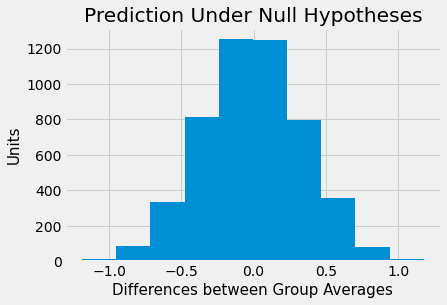

In [ ]:
differences_df.hist()
plt.title('Prediction Under Null Hypotheses');
plt.xlabel('Differences between Group Averages',fontsize=15)
plt.ylabel('Units',fontsize=15);
print('Observed Difference:', observed_difference)

The observed value of the statistic and the predicted behavior of the statistic under the null hypothesis are inconsistent.Since the observed value is far to the right of histogram. 
CONCLUSION:The average Age of mothers who smoke is less than the average age of motherswho are non-smokers.

EMPIRICAL P VALUE TEST

In [ ]:
np.count_nonzero(differences <= observed_difference)/differences.size

0.9908